In [51]:
#TITANIC

In [52]:
#Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
#Loading the Titanic Dataset

In [55]:
df = pd.read_csv(r'C:\Users\midhu\OneDrive\Desktop\Project\Data Science\titanic.csv')

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
#EDA

In [58]:
#1.Missing values check

In [59]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [60]:
#2.Visualization of Survived, Age and relationship between Survived and Pclass columns

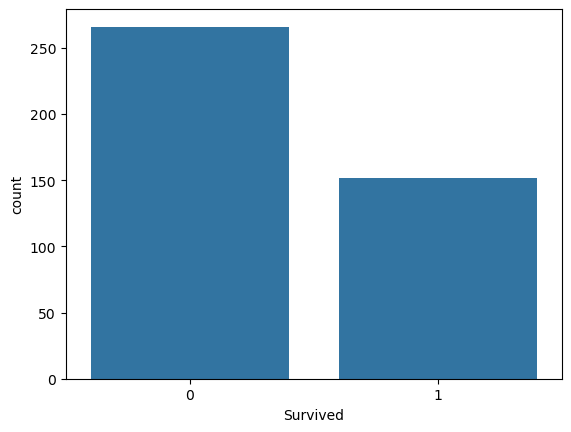

In [61]:
sns.countplot(x='Survived', data=df)
plt.show()

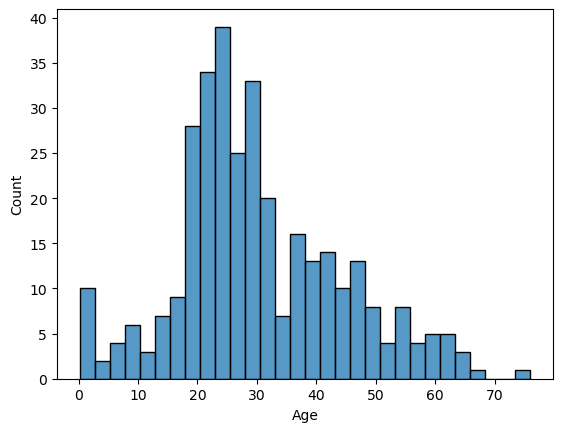

In [62]:
sns.histplot(df['Age'].dropna(), kde=False, bins=30)
plt.show()

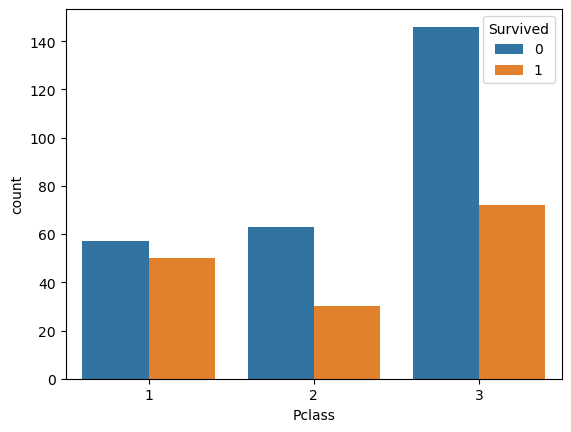

In [63]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()

In [64]:
#Data Preprocessing

In [65]:
#1.Handling missing values

In [66]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].mode()[0])

In [67]:
#2.Deleting unwanted columns

In [68]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [69]:
df = df.drop(columns=['Cabin', 'Ticket', 'Name'])

In [70]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')


In [71]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


In [72]:
#3.Converting categorical problems to numeric

In [73]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [74]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [75]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,0,3,34.5,0,0,7.8292,True,True,False
1,893,1,3,47.0,1,0,7.0000,False,False,True
2,894,0,2,62.0,0,0,9.6875,True,True,False
3,895,0,3,27.0,0,0,8.6625,True,False,True
4,896,1,3,22.0,1,1,12.2875,False,False,True


In [76]:
#Model Building

In [77]:
#1.Splitting the data

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
#2.Training a random forest classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [83]:
#Building the model

In [84]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [85]:
#Making predictions

In [86]:
y_pred = model.predict(X_test)

In [87]:
#Evaluating the model

In [88]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
[[50  0]
 [ 0 34]]


In [89]:
#Feature importance analysis

In [90]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

       Feature  Importance
6     Sex_male    0.837651
5         Fare    0.052433
0  PassengerId    0.031485
2          Age    0.027906
4        Parch    0.015823
7   Embarked_Q    0.011148
3        SibSp    0.011089
1       Pclass    0.007685
8   Embarked_S    0.004782


In [91]:
#Cross validation

In [92]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0
